In [2]:
import numpy as np
import cv2
import os

In [ ]:
cap = cv2.VideoCapture('001_0.mpg')
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
# Create some random colors
color = np.random.randint(0,255,(100,3))
# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)
while(1):
    ret,frame = cap.read()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    # Select good points
    good_new = p1[st==1]
    good_old = p0[st==1]
    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new,good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
        frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
    img = cv2.add(frame,mask)
    cv2.imshow('frame',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)
cv2.destroyAllWindows()
cap.release()

# A partir de aqui el vector denso optico

In [1]:
import numpy as np
import cv2
import os
from PIL import Image 

In [2]:
img_array = []
img_array_2 = []
path="png-segments"
ñ=0

# resaltar el movimiento a partir de la resta de dos imagenes y un rango de -5 al valor max
img=np.array(cv2.imread("png-segments/001/frame000027_cam0.png"),np.float32)

vec=np.zeros(img.shape[:2])
par=1
path="png-segments"

# for folder_name in os.listdir(path): #for para recorrer cada folder
#         folder_name="png-segments/"+folder_name
folder_name="png-segments/002"
for frame in os.listdir(folder_name):#for para recorrer los frames dentro de cada folder
    if(par==1):
        frame_uno=folder_name+"/"+frame
        frame_uno = np.array(cv2.imread(frame_uno),np.float32) #aquí está el frame
        par=2
    else:
        frame_dos=folder_name+"/"+frame                
        frame_dos = np.array(cv2.imread(frame_dos),np.float32) #aquí está el frame
#         flow=np.array(abs(frame_dos[:240,:]-frame_uno[:240,:]),np.uint8)[:,:,0] #resultado del movimiento
        flow=np.array(abs(frame_dos[:240,:]-frame_uno[:240,:]),np.uint8)#resultado del movimiento
    
        flow3=Image.fromarray(flow,'RGB')
#         display(flow3)
        max_value=np.max(flow)
        for i in range(flow.shape[0]):
            for j in range(flow.shape[1]):
                if(flow[i,j,0]<=max_value-100):
                    flow[i,j]=0
        frame_uno=frame_dos
#         flow2=Image.fromarray(flow,'RGB')
#         display(flow2)
        
        img_array.append(flow)
        img_array_2.append(flow3)
        ñ=ñ+1
print('salió del for')

salió del for


PIL.Image.Image

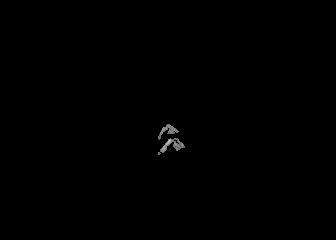

In [6]:
flow=Image.fromarray(img_array[5],'RGB')
# flow=img_array_2[5]
display(type(flow))
display(flow)
# print(img_array[0].shape)

In [29]:
# para crear los directorios nuevos
path="imgs-nuevas/001"
for folder in os.listdir('png-segments'):
    path="imgs_nuevas/"+folder
    try:
        os.makedirs(path)
    except:
        print("Ya existe el directorio"+path)

In [8]:
# to create image to image
import scipy.misc

scipy.misc.imsave(path+'outfile.jpg', img_array[5])

C:\ProgramData\Anaconda3\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  after removing the cwd from sys.path.


FileNotFoundError: [Errno 2] No such file or directory: 'imgs-nuevas/001/outfile.jpg'

In [ ]:
h,w,l=img_array[0].shape
size=(h,w)
out = cv2.VideoWriter('EsteSi.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
out2 = cv2.VideoWriter('EsteSi_dos.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
# out = cv2.VideoWriter('EsteSi.avi',-1, 15, size)

for i in range(len(img_array)):
    out.write(img_array[i])
    out2.write(img_array[i])
# Release everything if job is finished
# cap.release()


In [ ]:
out.release()
cv2.destroyAllWindows()

# 

In [ ]:
# img_prueba=cv2.imread('png-segments/002/frame000024_cam0.png')
# img_prueba2=cv2.imread('png-segments/002/frame000025_cam0.png')
img_prueba=np.array(cv2.imread('png-segments/002/frame000024_cam0.png'),np.float32)
img_prueba2=np.array(cv2.imread('png-segments/002/frame000025_cam0.png'),np.float32)

flow=np.array(abs(img_prueba2-img_prueba),np.uint8)
flow[0,2]=255
print(flow.shape)
flow=Image.fromarray(flow,'RGB')
display(flow)

In [3]:

# Dense Optical Flow in OpenCV
cap = cv2.VideoCapture("project.avi")
ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255
while(1):
    ret, frame2 = cap.read()
    next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
    cv2.imshow('frame2',bgr)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    elif k == ord('s'):
        cv2.imwrite('opticalfb.png',frame2)
        cv2.imwrite('opticalhsv.png',bgr)
    prvs = next
cap.release()
cv2.destroyAllWindows()

error: OpenCV(3.4.2) c:\miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\imgproc\src\color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'cv::CvtHelper<struct cv::Set<3,4,-1>,struct cv::Set<1,-1,-1>,struct cv::Set<0,2,5>,2>::CvtHelper'


In [ ]:
import cv2
import numpy as np

writer = cv2.VideoWriter('test1.avi', cv2.VideoWriter_fourcc(*'PIM1'), 25, (640, 480), False)
for i in range(100):
    x = np.random.randint(255, size=(480, 640)).astype('uint8')
    writer.write(x)
writer

In [ ]:
for file in os.listdir("videos"):
#     print(file)
    cap = cv2.VideoCapture(file)

    # Check if camera opened successfully
    if (cap.isOpened()== False): 
      print("Error opening video stream or file")

    # Read until video is completed
    while(cap.isOpened()):
      # Capture frame-by-frame
      ret, frame = cap.read()
      if ret == True:

        # Display the resulting frame
        cv2.imshow('Frame',frame[:250,:])

        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
          break

      # Break the loop
      else: 
        break

    # When everything done, release the video capture object
    cap.release()
    # Closes all the frames
cv2.destroyAllWindows()

In [ ]:
cv2.resize?


In [ ]:
# vidcap = cv2.VideoCapture('myvid2.mp4')
success,image = cap.read()
count = 0;
print ("I am in success")
type(cap)
while success:
  success,image = cap.read()
  height , width , layers =  image.shape
  new_h=height/2
  new_w=width/2
  resize = cv2.resize(image, (new_w, new_h)) 
  cv2.imwrite("%03d.jpg" % count, resize) 